# Assignment 1

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

### 1.1 Continuous compounding

We compare different number of periods per year to the continous compounding we want to prove. The interest rate is fixed at 6% for this example.

In [19]:
interest = 0.06
C = 100
period_fractions = [1, 2, 4, 6, 12, 365, 1000, 10000]
B = []

for i in period_fractions:
    B_i = C * ((1 + interest * 1 / i) **  i)
    B.append(B_i)

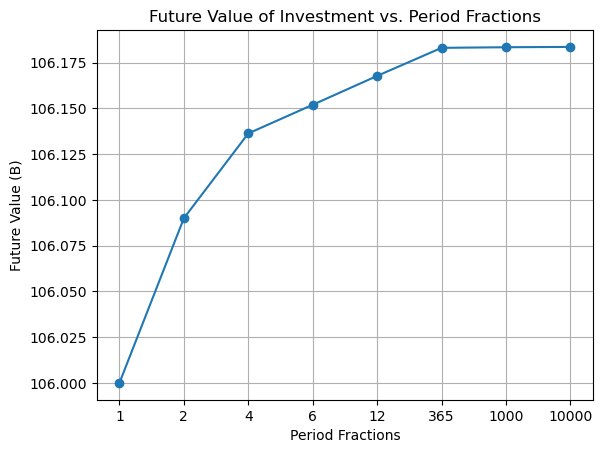

In [20]:
# Create equally spaced x-axis values
x_values = range(len(period_fractions))

plt.plot(x_values, B, marker='o', linestyle='-')
plt.xticks(x_values, period_fractions)
plt.xlabel('Period Fractions')
plt.ylabel('Future Value (B)')
plt.title('Future Value of Investment vs. Period Fractions')
plt.grid(True)
plt.show()

### 1.2 Coupon bond Valuation

We now proceed to calculate the value of a coupon bond with a principal of €50.000, a maturity of 2 years and quarterly (i.e. every 3 months) coupons of €300. The risk-free rate is 1.5% at continuous compounding

In [28]:
P = 50000
T = 2
interest = 0.015
coupon = 300
periods = np.linspace(0.25, T, 8)

# We first calculate the Present Value of the coupons
PV_coupons = 0
for i in periods:
    PV_i = np.exp(-interest * i) * coupon
    PV_coupons += PV_i
    
# We then calculate the PV of the principal value
PV_principal = np.exp(-interest * T) * P

# Fair value
PV_coupon_bond = PV_principal + PV_coupons
print(f"The fair value of the coupon bond is: €{PV_coupon_bond:.2f}")

The fair value of the coupon bond is: €50882.20


### 1.4 Payoff graphs

(0.0, 205.0)

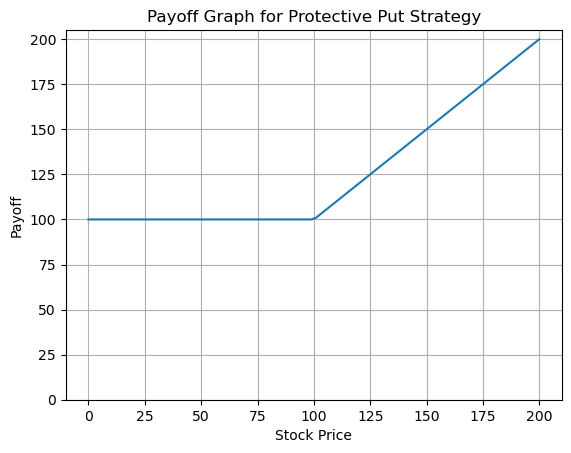

In [40]:
# Payoff graph for protective put strategy
stock_prices = np.linspace(0, 200, 100)
K = 100
payoff = np.zeros(len(stock_prices))

for i in range(len(stock_prices)):
    stock_payoff = stock_prices[i]
    if stock_prices[i] <= K:
        put_payoff = K - stock_prices[i]
    else:
        put_payoff = 0
    payoff[i] = put_payoff + stock_payoff
    
plt.plot(stock_prices, payoff)
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Payoff Graph for Protective Put Strategy')
plt.grid(True)
plt.ylim(0)

(0.0, 205.0)

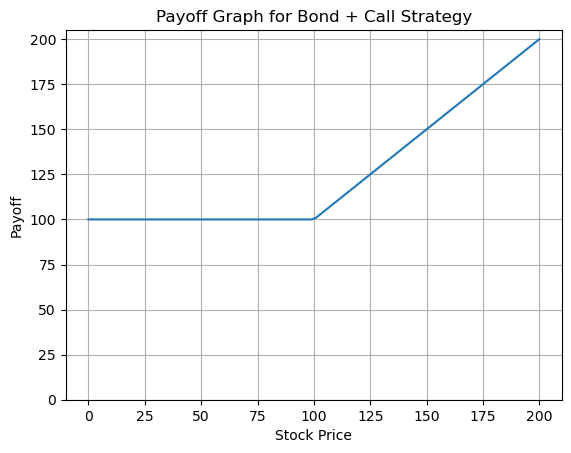

In [41]:
# Payoff graph for bond + call strategy
stock_prices = np.linspace(0, 200, 100)
K = 100
payoff = np.zeros(len(stock_prices))

for i in range(len(stock_prices)):
    bond_payoff = K
    if stock_prices[i] <= K:
        call_payoff = 0
    else:
        call_payoff = stock_prices[i] - K
    payoff[i] = call_payoff + bond_payoff
    
plt.plot(stock_prices, payoff)
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Payoff Graph for Bond + Call Strategy')
plt.grid(True)
plt.ylim(0)